# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.357285e+01     1.397257e+01
 * time: 0.002913951873779297
     1     6.337143e+01     1.175336e+01
 * time: 0.00869297981262207
     2     5.786215e+01     1.280282e+01
 * time: 0.022047042846679688
     3     4.178260e+01     8.607848e+00
 * time: 0.040452003479003906
     4     3.211090e+01     7.616439e+00
 * time: 0.05891013145446777
     5     2.818580e+01     6.573627e+00
 * time: 0.07455110549926758
     6     1.341613e+01     2.490991e+00
 * time: 0.12772297859191895
     7     1.268550e+01     3.991038e+00
 * time: 0.1386561393737793
     8     1.061218e+01     3.674075e+00
 * time: 0.1514899730682373
     9     9.562513e+00     6.092949e+00
 * time: 0.16466212272644043
    10     8.255766e+00     2.769315e+00
 * time: 0.17780113220214844
    11     7.187534e+00     3.257660e+00
 * time: 0.19071412086486816
    12     6.993604e+00     4.456576e+00
 * time: 0.20129895210266113
    13     6.721608e+00     2.916687e+00
 * time

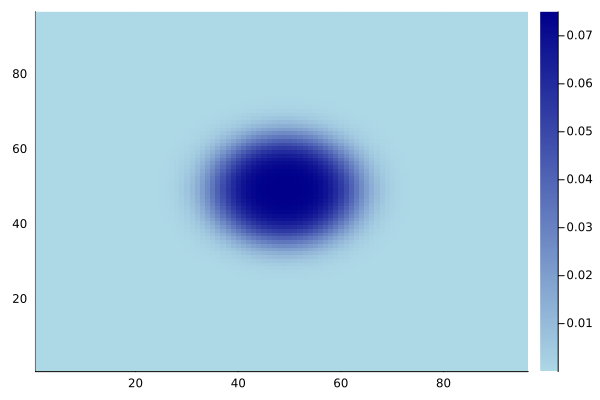

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)